## imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

## over-sampled data

In [2]:
# read data

df_o = pd.read_csv('over-sample.csv')

In [3]:
# choose train and test variable

X = df_o.drop('Outcome', axis=1)
y = df_o['Outcome']

In [4]:
# scale data

scaler = StandardScaler()
scaler.fit(X)
Xstd = scaler.transform(X)
X = Xstd

#train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=101)

In [5]:
# accuracy of over-sampled data with 25% test size

from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
pred= model.predict(X_test)
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, pred)

0.7545454545454545

### Polynomial SVM

In [6]:
# basic model (to put best params in after grid search)

from sklearn.svm import SVC
svm_polynomial = SVC(kernel="poly",C=1.0,degree=2.0,gamma='scale')
svm_polynomial.fit(X_train,y_train)
print("Accuracy of svm(poly)%: ",svm_polynomial.score(X_test,y_test)*100)
print("\n\nOther Default Parameters: ",svm_polynomial.get_params())

Accuracy of svm(poly)%:  64.54545454545455


Other Default Parameters:  {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 2.0, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


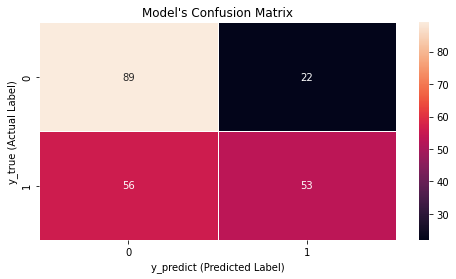

True negative =  89
False positive =  22
False negative =  56
True positive =  53
              precision    recall  f1-score   support

           0       0.61      0.80      0.70       111
           1       0.71      0.49      0.58       109

    accuracy                           0.65       220
   macro avg       0.66      0.64      0.64       220
weighted avg       0.66      0.65      0.64       220



In [7]:
# polynomial svm performance analysis (before grid search)

#confusion matrix 
y_pred = svm_polynomial.predict(X_test)
y_true = y_test

# 0 value is negative
# 1 value is positive
cmatrix_polynomial = confusion_matrix(y_true,y_pred,labels=[0,1])

f,ax = plt.subplots(figsize=(8,4))
sns.heatmap(cmatrix_polynomial,annot=True,linewidths=0.5,cbar=True,linecolor="white",fmt='.0f',ax=ax)
plt.title("Model's Confusion Matrix")
plt.xlabel("y_predict (Predicted Label)")
plt.ylabel("y_true (Actual Label)")
plt.show()

print('True negative = ', cmatrix_polynomial[0][0])
print('False positive = ', cmatrix_polynomial[0][1])
print('False negative = ', cmatrix_polynomial[1][0])
print('True positive = ', cmatrix_polynomial[1][1])

from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

#### grid search

In [13]:
# grid search 

param_grid = { 
    'C' : [0.001, 0.01, 0.1, 1, 5, 10],
    'degree':list(range(1,7))
}
svm_poly = SVC(kernel="poly")
svm_gscv2 = GridSearchCV(svm_poly,param_grid) #cv default = 5
svm_gscv2.fit(X_train,y_train)

print("Tuned best parameters for kernel poly svm: ",svm_gscv2.best_params_ ) 
print("Best score: {}".format(svm_gscv2.best_score_))

Tuned best parameters for kernel poly svm:  {'C': 0.01, 'degree': 1}
Best score: 0.7432685634975711


In [14]:
# basic model (with best params)

from sklearn.svm import SVC
svm_polynomial = SVC(kernel="poly",C=0.01,degree=1,gamma='scale')
svm_polynomial.fit(X_train,y_train)
print("Accuracy of svm(poly)%: ",svm_polynomial.score(X_test,y_test)*100)
print("\n\nOther Default Parameters: ",svm_polynomial.get_params())

Accuracy of svm(poly)%:  70.45454545454545


Other Default Parameters:  {'C': 0.01, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 1, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


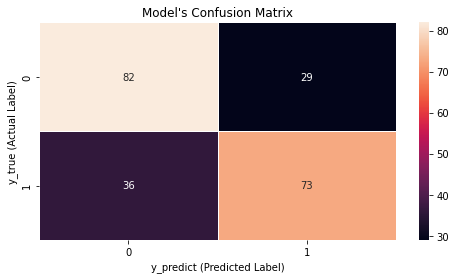

True negative =  82
False positive =  29
False negative =  36
True positive =  73
              precision    recall  f1-score   support

           0       0.69      0.74      0.72       111
           1       0.72      0.67      0.69       109

    accuracy                           0.70       220
   macro avg       0.71      0.70      0.70       220
weighted avg       0.71      0.70      0.70       220



In [15]:
# polynomial svm performance analysis (after grid search)

#confusion matrix 
y_pred = svm_polynomial.predict(X_test)
y_true = y_test

# 0 value is negative
# 1 value is positive
cmatrix_polynomial = confusion_matrix(y_true,y_pred,labels=[0,1])

f,ax = plt.subplots(figsize=(8,4))
sns.heatmap(cmatrix_polynomial,annot=True,linewidths=0.5,cbar=True,linecolor="white",fmt='.0f',ax=ax)
plt.title("Model's Confusion Matrix")
plt.xlabel("y_predict (Predicted Label)")
plt.ylabel("y_true (Actual Label)")
plt.show()

print('True negative = ', cmatrix_polynomial[0][0])
print('False positive = ', cmatrix_polynomial[0][1])
print('False negative = ', cmatrix_polynomial[1][0])
print('True positive = ', cmatrix_polynomial[1][1])

from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

#### cross validation

In [17]:
# cross validation

poly_svc = SVC(kernel='poly',C=1,degree=3)
poly_svc.fit(X,y)
poly_svc_result = cross_validate(poly_svc,X, y, cv=5,scoring='accuracy',return_train_score=True)
print("Cv:5, Test Score: {}".format(poly_svc_result['test_score']))
print("Cv:5, Train Score: {}".format(poly_svc_result['train_score']))


accuracy = cross_val_score(poly_svc,X,y,cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy.mean(),accuracy.std() * 2))

f1 = cross_val_score(poly_svc,X,y,cv=5,scoring='f1')
print('F1 Score : ',f1)

mse = cross_val_score(poly_svc,X,y,cv=5,scoring='neg_mean_squared_error')
print('Negative Mean Squared Error: ', mse)
print("Cv = 5, recall = ",cross_val_score(poly_svc, X, y, scoring='recall'))
print("Cv = 5, precision = ",cross_val_score(poly_svc, X, y, scoring='precision'))

Cv:5, Test Score: [0.71590909 0.75       0.72727273 0.69142857 0.74857143]
Cv:5, Train Score: [0.74643875 0.78347578 0.75213675 0.73257468 0.78093883]
Accuracy: 0.73 (+/- 0.04)
F1 Score :  [0.69512195 0.77777778 0.70731707 0.63013699 0.76595745]
Negative Mean Squared Error:  [-0.28409091 -0.25       -0.27272727 -0.30857143 -0.25142857]
Cv = 5, recall =  [0.64772727 0.875      0.65909091 0.52873563 0.81818182]
Cv = 5, precision =  [0.75       0.7        0.76315789 0.77966102 0.72      ]


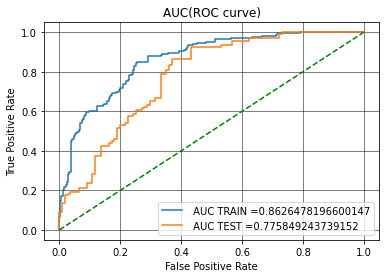

In [18]:
# roc curve of train and test accuracy

from sklearn import svm
from sklearn.model_selection import GridSearchCV  
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

np.random.seed(0)

random_state = np.random.RandomState(0)
classifier = OneVsRestClassifier(svm.SVC(kernel='poly', probability=True,
                                 random_state=random_state))
classifier.fit(X_train, y_train)

y_train_pred = classifier.decision_function(X_train)    
y_test_pred = classifier.decision_function(X_test) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()
#when AUC is 0.5-1, high chance that classifier is able to distinguish positive class valuces from negative class (detect more true positive and true negative)